In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
# config
N_SAMPLES = 1000
N_CENTERS = 2
N_FEATURES = 2
RANDOM_STATE = 0
TEST_SIZE = 0.2
GRID_WIDTH = 0.1
NUM_PTS = 100

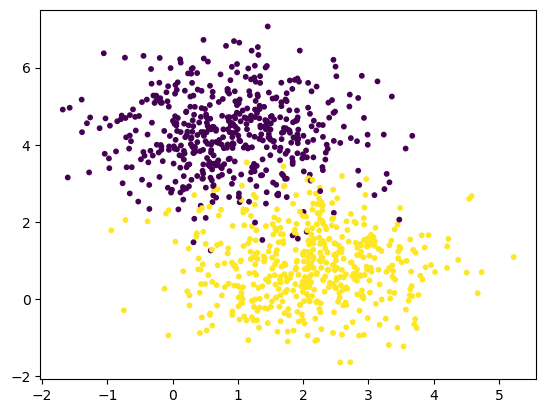

In [3]:
X, y = make_blobs(n_samples=N_SAMPLES, centers=N_CENTERS, n_features=N_FEATURES, random_state=RANDOM_STATE)
plt.scatter(X[:,0], X[:,1], c=y, s=10)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# building classifier
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [5]:
def get_grid(x, grid_width):
    min_x, max_x = min(x), max(x)
    grid_x = np.arange(min_x, max_x, grid_width)
    return grid_x

def get_mesh_predictions(X, grid_width):
    # building grid
    grid_x1 = get_grid(X[:,0], grid_width)
    grid_x2 = get_grid(X[:,1], grid_width)

    # building mesh
    x1, x2 = np.meshgrid(grid_x1, grid_x2)

    # getting predictions for each point in mesh
    grid_X = np.vstack((x1.ravel(), x2.ravel())).transpose()
    grid_Y = clf.predict(grid_X)
    grid_Y = grid_Y.reshape(x1.shape)
    return x1, x2, grid_Y

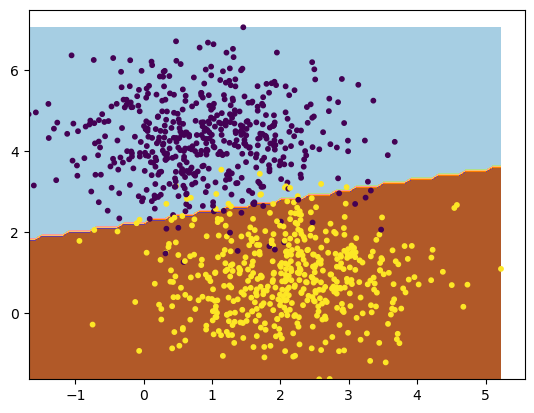

In [6]:
grid_X1, grid_X2, grid_Y = get_mesh_predictions(X, GRID_WIDTH)
plt.contourf(grid_X1, grid_X2, grid_Y, cmap='Paired')
plt.scatter(X[:,0], X[:,1], c=y, s=10)
plt.show()

In [7]:
def get_boundary_pts(grid_X1, grid_X2, grid_Y, num_pts):
    """
    Boundary points are points from two classes 
    which are closest among each other
    """
    mesh_points = np.vstack((grid_X1.ravel(), grid_X2.ravel(), grid_Y.ravel())).transpose()
    pts1 = mesh_points[mesh_points[:,2]==0][:,[0,1]]
    pts2 = mesh_points[mesh_points[:,2]==1][:,[0,1]]

    # calculating distance matrix 
    dist = cdist(pts1, pts2)
    # sorting based on distance
    idxs = np.dstack(np.unravel_index(np.argsort(dist.ravel()), dist.shape))[0]
    # selecting closest num_pts points 
    idxs1 = idxs[:num_pts,0]
    idxs2 = idxs[:num_pts,1]    
    return pts1[idxs1], pts2[idxs2]

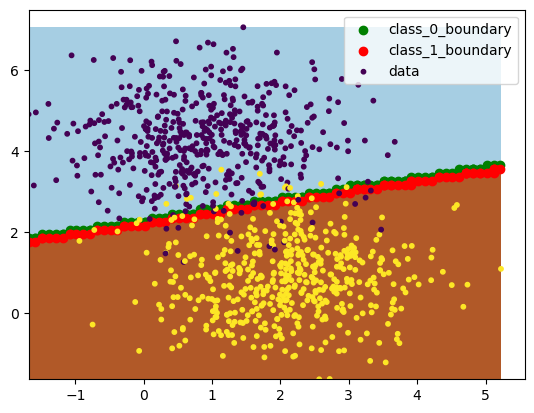

In [8]:
pts1, pts2 = get_boundary_pts(grid_X1, grid_X2, grid_Y, NUM_PTS)
plt.contourf(grid_X1, grid_X2, grid_Y, cmap='Paired')
plt.scatter(pts1[:,0], pts1[:,1], c='g', label='class_0_boundary')
plt.scatter(pts2[:,0], pts2[:,1], c='r', label='class_1_boundary')
plt.scatter(X[:,0], X[:,1], c=y, s=10, label='data')
plt.legend()
plt.show()

In [9]:
def get_boundary_line(pts):
    rgn = LinearRegression()
    rgn.fit(pts[:,0].reshape(-1,1), pts[:,1])
    return rgn.intercept_, rgn.coef_

pts = np.vstack((pts1, pts2))
beta0, beta1 = get_boundary_line(pts)

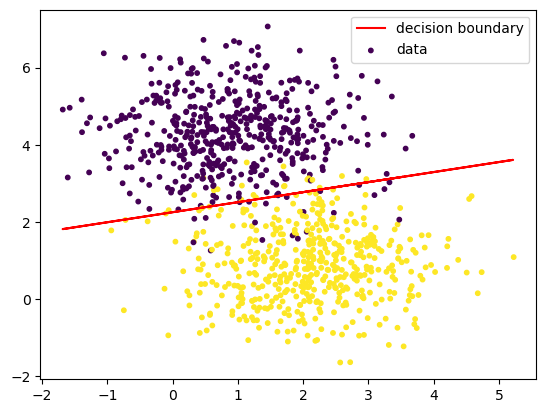

In [10]:
plt.scatter(X[:,0], X[:,1], c=y, s=10, label='data')
plt.plot(pts[:,0], beta0 + beta1 * pts[:,0], c='r', label='decision boundary')
plt.legend()
plt.show()